In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df,city_df, how="left", on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [17]:
drivergroup = combined_df.groupby(["type","city"])
drivertotal = drivergroup['driver_count'].sum()
drivertotal

type      city                
Rural     Bradshawfurt              70
          Garzaport                 21
          Harringtonfort            24
          Jessicaport                6
          Lake Jamie                24
          Lake Latoyabury           22
          Michaelberg               72
          New Ryantown              12
          Newtonview                 4
          North Holly               72
          North Jaime                8
          Penaborough               30
          Randallchester            45
          South Jennifer            49
          South Marychester          8
          South Saramouth           28
          Taylorhaven                6
          West Heather              36
Suburban  Barronchester            176
          Bethanyland              396
          Brandonfort              190
          Colemanland              506
          Davidfurt                391
          East Aaronbury            63
          East Danielview        

Text(50,0.5,'Note: Circle size correlates with driver count per city')

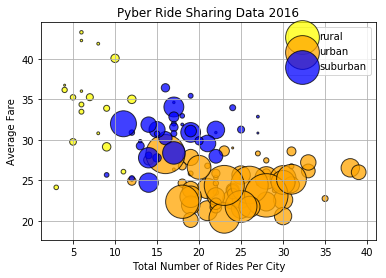

In [20]:
# Obtain the x and y coordinates for each of the three city types



x = combined_df.groupby(["type","city"]).mean()
y = combined_df.groupby(["type","city"]).count()

y_rural = x.loc["Rural","fare"]
x_rural = y.loc["Rural","ride_id"]



y_urban = x.loc["Urban","fare"]
x_urban = y.loc["Urban","ride_id"]


y_suburban = x.loc["Suburban","fare"]
x_suburban = y.loc["Suburban","ride_id"]


# Build the scatter plots for each city types
plt.scatter(x_rural,y_rural,marker="o",facecolors="yellow",edgecolors="black",alpha=0.75, s = drivertotal,label='rural')
plt.scatter(x_urban,y_urban,marker="o",facecolors="orange",edgecolors="black",alpha=0.75,s = drivertotal,label='urban')
plt.scatter(x_suburban,y_suburban,marker="o",facecolors="blue",edgecolors="black",alpha=0.75,s = drivertotal,label='suburban')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare")
# Create a legend
plt.grid()
plt.legend(loc="best")
plt.Text(50,0.5,'Note: Circle size correlates with driver count per city')
# Incorporate a text label regarding circle size



## Total Fares by City Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


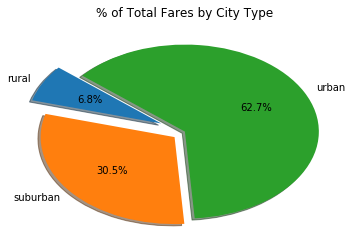

In [5]:
# Calculate Type Percents


explode = (.2,.1,0)

citygroup = combined_df.groupby(["type"])
totalfaretype = citygroup['fare'].sum()
print(totalfaretype)

# Build Pie Chart
plt.pie(totalfaretype, autopct="%1.1f%%",explode=explode,labels=["rural","suburban","urban"],shadow=True,startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/Total Fares by City.png")

## Total Rides by City Type

type
Rural        580968240341287
Suburban    3106884522576766
Urban       7919412664056093
Name: ride_id, dtype: int64


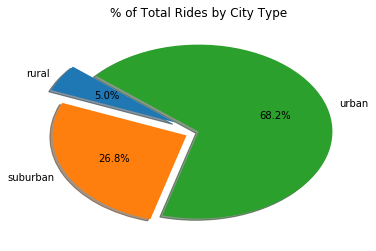

In [6]:

explode = (.2,.1,0)

citygroup = combined_df.groupby(["type"])
totalridetype = citygroup['ride_id'].sum()
print(totalridetype)

# Build Pie Chart
plt.pie(totalridetype, autopct="%1.1f%%",labels=["rural","suburban","urban"],explode=explode,shadow=True,startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/Total Rides by City.png")


## Total Drivers by City Type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


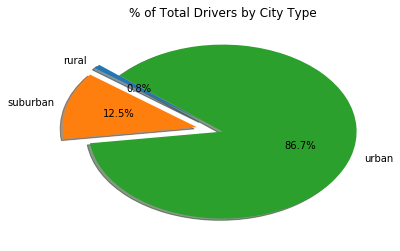

In [7]:
explode = (.2,.2,0)

citygroup = combined_df.groupby(["type"])
totaldrivetype = citygroup['driver_count'].sum()
print(totaldrivetype)

# Build Pie Chart
plt.pie(totaldrivetype, autopct="%1.1f%%",labels=["rural","suburban","urban"],explode=explode,shadow=True,startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/Total Drivers by City.png")
